### Prepare data for modularization

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np


features_df = pd.read_csv(r'C:\Users\ayemi\OneDrive\Documents\The_Haritz\data\wallet_features_with_risk_score.csv')


# Drop identifiers and label column
X = features_df.drop(columns=['wallet_address', 'risk_label', 'risk_score'])  # Drop non-feature columns
y = features_df['risk_label']  # Target variable

X = X.replace([np.inf, -np.inf], np.nan)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.92         6

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7

ROC AUC Score: 0.8333333333333334


c:\Users\ayemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:34:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ayemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ayem

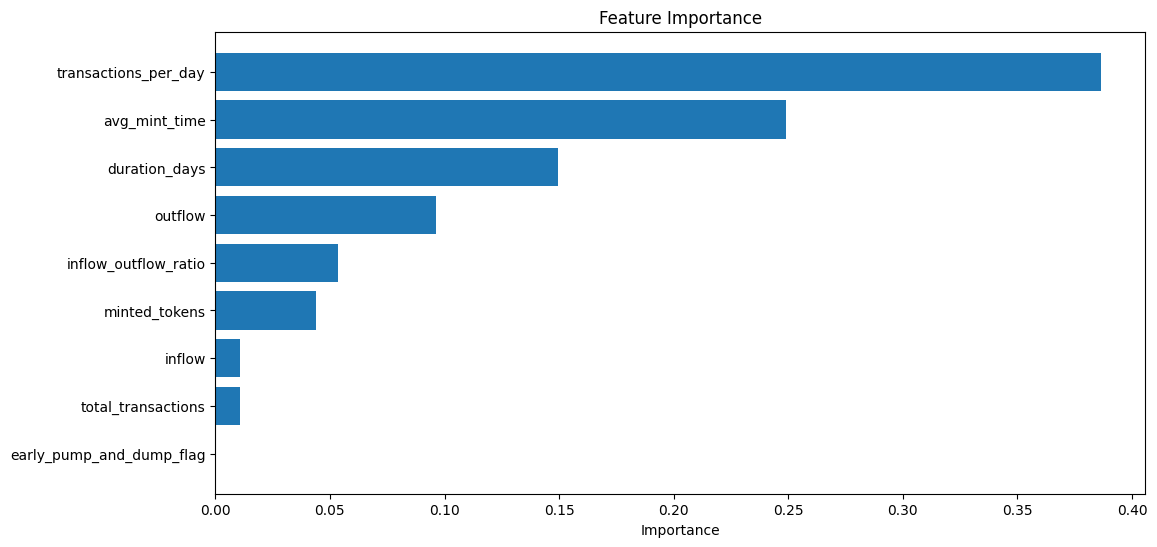

In [48]:
feature_importances = model.feature_importances_
features_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(features_df['feature'], features_df['importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.savefig(r'C:\Users\ayemi\OneDrive\Documents\The_Haritz\data\feature_importance.png')
plt.show()

### save trained model

In [47]:
import joblib
joblib.dump(model, 'model/xgb_model.pkl')

['model/xgb_model.pkl']

,feature,importance
9,risk_score,0.316168
4,duration_days,0.227872
2,outflow,0.179551
5,transactions_per_day,0.156767
3,inflow_outflow_ratio,0.111263
0,total_transactions,0.008379
1,inflow,0.000000
6,minted_tokens,0.000000
7,avg_mint_time,0.000000
8,early_pump_and_dump_flag,0.000000
